# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

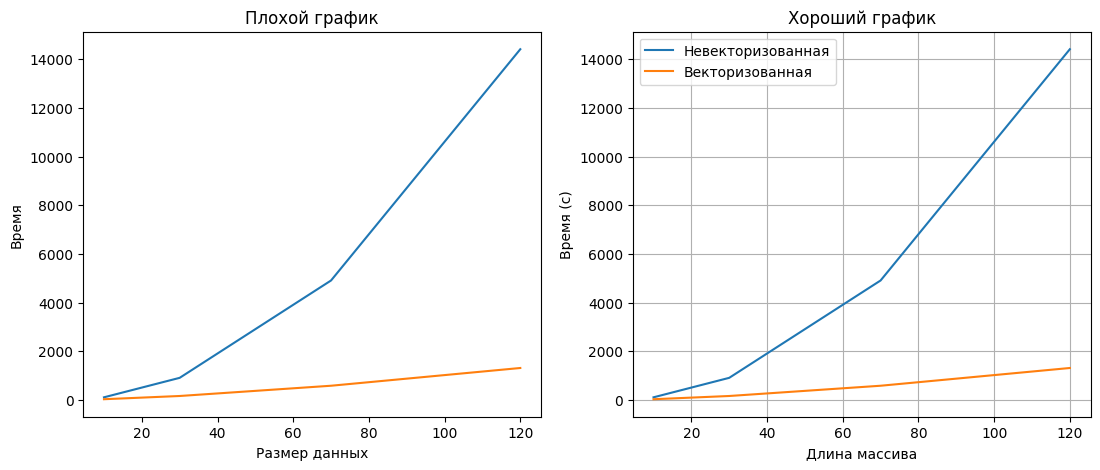

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

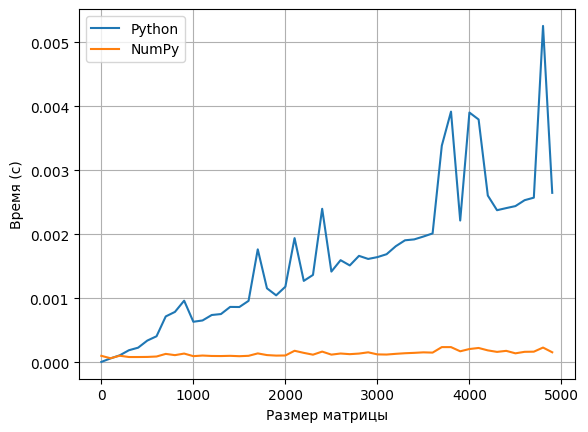

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

def prod_non_zero_diag(x):
    ans = 1
    for i in range(len(x)):
        if x[i][i] != 0:
            ans *= x[i][i]
    return ans

def prod_non_zero_diag_vec(x) -> int:
    x_non_zero = np.diag(x)
    x_non_zero = x_non_zero[x_non_zero != 0]
    return x_non_zero.prod()

X = []
Y_ = []
Y_vec = []

for len_array in range(0, 5000, 100):
    X.append(len_array)

    matrix_1 = np.array([[__import__('random').randint(0, 1) for j in range(len_array)] for i in range(len_array)])

    start_time = time.time()
    a = prod_non_zero_diag(matrix_1)
    end_time = time.time()

    Y_.append(end_time - start_time)

    start_time = time.time()
    b = prod_non_zero_diag_vec(matrix_1)
    end_time = time.time()

    Y_vec.append(end_time - start_time)

plt.figure()

plt.plot(X, Y_, label=u"Python")
plt.plot(X, Y_vec, label=u"NumPy")

plt.xlabel(u"Размер матрицы")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()




* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


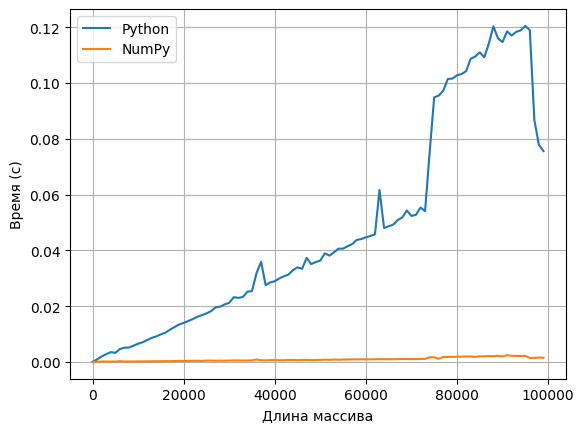

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time


def are_multisets_equal(x, y):
    if len(x) != len(y):
        return False

    x_ = list(x)
    y_ = list(y)

    x_.sort()
    y_.sort()

    for i in range(len(x)):
        if x_[i] != y_[i]:
            return False
    return True

def are_multisets_equal_vec(x, y):
    x = np.sort(x)
    y = np.sort(y)
    return np.array_equal(x, y)


X = []
Y_ = []
Y_vec = []

for len_array in range(0, 100000, 1000):
    X.append(len_array)

    vector_1 = np.random.randint(0, 30, size=(len_array))
    vector_2 = np.random.randint(0, 30, size=(len_array))

    start_time = time.time()
    a = are_multisets_equal(vector_1, vector_2)
    end_time = time.time()

    Y_.append(end_time - start_time)

    start_time = time.time()
    b = are_multisets_equal_vec(vector_1, vector_2)
    end_time = time.time()

    Y_vec.append(end_time - start_time)

plt.figure()

plt.plot(X, Y_, label=u"Python")
plt.plot(X, Y_vec, label=u"NumPy")

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

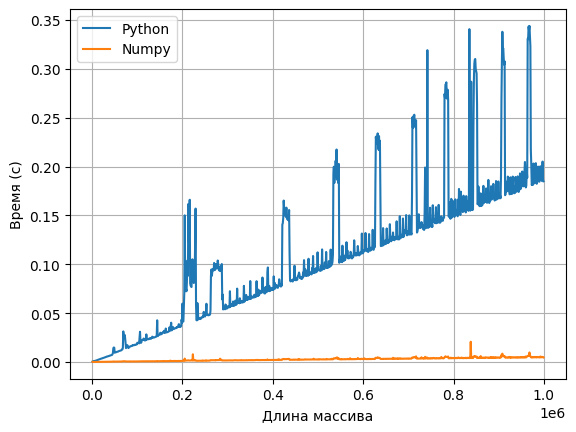

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time

def max_after_zero(x):
    ans = -1
    for i in range(1, len(x)):
        if x[i - 1] == 0:
            ans = max(ans, x[i])
    return ans


def max_after_zero_vec(x):
    mask = x == 0
    return np.max(x[1:][mask[:-1]])

X = []
Y_ = []
Y_vec = []

for len_array in range(1000, 1000000, 1000):
    x = np.random.randint(0, 10, size=len_array)

    X.append(len_array)

    start_time = time.time()
    max_after_zero(list(x))
    end_time = time.time()
    Y_.append(end_time - start_time)

    start_time = time.time()
    max_after_zero_vec(x)
    end_time = time.time()
    Y_vec.append(end_time - start_time)

plt.figure()
plt.plot(X, Y_, label=u"Python")
plt.plot(X, Y_vec, label=u"Numpy")

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()





* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


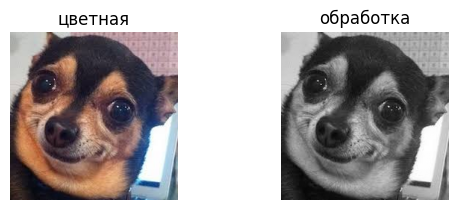

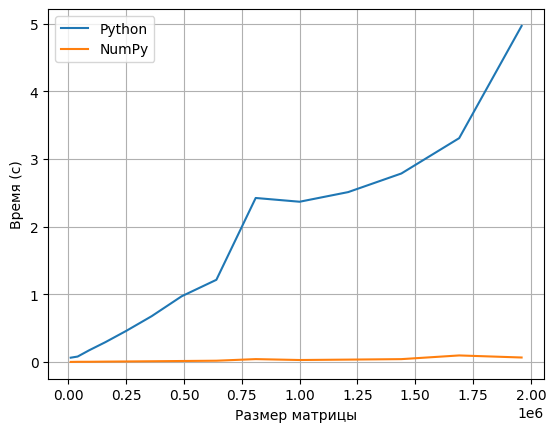

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

arr = np.array([0.299, 0.587, 0.114])

def convert_image(img, coefs):
    ans = [[0] * len(img[0]) for i in range(len(img))]
    for i in range(len(img)):
        for j in range(len(img[0])):
            ans[i][j] += img[i][j][0] * coefs[0] + img[i][j][1] * coefs[1] + img[i][j][2] * coefs[2]
    return ans


def convert_image_np(img, coefs):
    return np.dot(img, arr)


img_array = cv2.imread("dog.png", 1)
img_array = img_array[:,:,::-1]

X = []
Y = []
Y_np = []

for i in range(100, 1500, 100):
    matrix = np.random.randint(0, 1, size=(i, i, 3))
    vec = np.random.randint(0, 1, size=3)

    X.append(i * i)

    start_time = time.time()
    img_convert = convert_image(matrix, vec)
    end_time = time.time()

    Y.append(end_time - start_time)

    start_time = time.time()
    img_convert_np = convert_image_np(matrix, vec)
    end_time = time.time()
    Y_np.append(end_time - start_time)


img_array_gray = convert_image(img_array, arr)

plt.subplot(2, 2, 1)
plt.imshow(img_array)
plt.title("цветная")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_array_gray, cmap="gray")
plt.title("обработка")
plt.axis("off")

plt.figure()
plt.plot(X, Y, label=u"Python")
plt.plot(X, Y_np, label=u"NumPy")

plt.xlabel(u"Размер матрицы")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

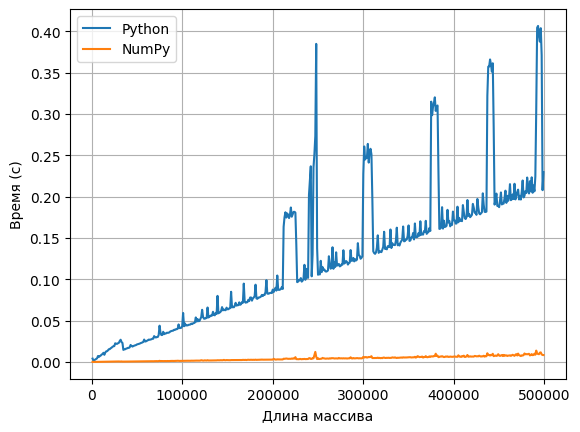

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

def run_length_encoding(x):
    ans = []
    ind = []
    cnt = 0
    for i in range(0, len(x) - 1):
        if x[i] != x[i + 1]:
            ans.append(x[i])
            ind.append(cnt)
            cnt = 1
        else:
            cnt += 1
    ans.append(x[-1])
    ind.append(cnt)

    return (ans, ind)

def run_length_encoding_np(x):
    x = np.array(x)
    mask_ = np.array(np.array(x - np.append(np.array(x[1:]), 0)) != 0)
    mask_[-1] = True

    ind = np.insert(np.where(mask_ == True), 0, -1)
    cnt = np.array(np.array(ind[1:]) - ind[:-1])

    return (x[mask_], cnt)

X = []
Y = []
Y_np = []

for len_array in range(1000, 500000, 1000):
    arr = np.random.randint(0, 1000, size=len_array)
    X.append(len_array)

    start_time = time.time()
    biba = run_length_encoding(arr)
    end_time = time.time()

    Y.append(end_time - start_time)

    start_time = time.time()
    boba = run_length_encoding_np(arr)
    end_time = time.time()
    Y_np.append(end_time - start_time)


plt.figure()
plt.plot(X, Y, label=u"Python")
plt.plot(X, Y_np, label=u"NumPy")

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()





* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

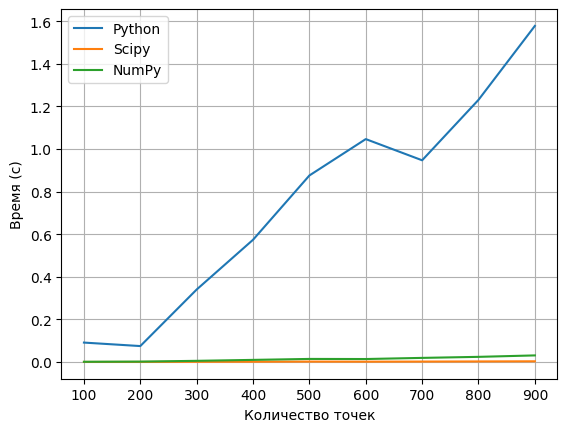

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import time

def pairwise_distance(x, y):
    ans = [[0] * len(y) for _ in range(len(x))]
    for i in range(len(x)):
        for j in range(len(y)):
            for l in range(len(x[0])):
                ans[i][j] += (x[i][l] - y[j][l]) ** 2
            ans[i][j] = math.sqrt(ans[i][j])
    return ans


def pairwise_distance_scipy(x, y):
    return scipy.spatial.distance.cdist(x, y)


def pairwise_distance_np(x, y):
    x = np.array(x)
    y = np.array(y)
    res = x[:, np.newaxis, :] - y[np.newaxis, :, :]
    return np.sqrt(np.sum(res ** 2, axis=2))


X = []
Y = []
Y_scipy = []
Y_np = []

for len_array in range(100, 1000, 100):
    X.append(len_array)

    x = np.random.randint(0, 10, size=(len_array, 2))
    y = np.random.randint(0, 10, size=(len_array, 2))

    start_time = time.time()
    biba = pairwise_distance(x, y)
    end_time = time.time()
    Y.append(end_time - start_time)

    start_time = time.time()
    aboba = pairwise_distance_scipy(x, y)
    end_time = time.time()
    Y_scipy.append(end_time - start_time)

    start_time = time.time()
    boba = pairwise_distance_np(x, y)
    end_time = time.time()
    Y_np.append(end_time - start_time)

    one = np.allclose(biba, aboba, atol=1e-6)
    two = np.allclose(biba, boba, atol=1e-6)
    three = np.allclose(aboba, boba, atol=1e-6)


plt.figure()
plt.plot(X, Y, label=u"Python")
plt.plot(X, Y_scipy, label=u"Scipy")
plt.plot(X, Y_np, label=u"NumPy")

plt.xlabel(u"Количество точек")
plt.ylabel(u"Время (с)")

plt.grid()
plt.legend()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### **Отчет о работе библиотеки Numpy**
##### В ходе данной работы было полученно, что фунцкии в библиотеке Numpy **гораздо** быстрее фунцкий, написанных собственноручно(***см. графики выше***). Поэтому для выполнения задач, связанных с операциями над матрицами и векторами (*такие как умножение и сложение*), стоит использовать данную библиотеку.

